In [4]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.8 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 13.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.8 MB 21.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 26.9 MB/s eta 0:00:01
   --------------------------------- ------ 8.3/9.8 MB 29.5 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 31.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 27.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pmdarima

   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/613.3 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/613.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 613.3/613.3 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------------- ---------------------- 1.2/2.8 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 35.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 29.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Datos Completos\Octubre-Abril.csv", sep= "\t", parse_dates=["PoC AB12"], dayfirst=True)
df.columns = ["Date","Pax"]
df = df.iloc[4:,:].reset_index(False)
df = df.drop("index", axis=1)

df["Date"] = pd.to_datetime(df["Date"],  format="%d-%m-%Y %H:%M:%S")
df["Pax"] = pd.to_numeric(df["Pax"])

df["month"] = df["Date"].dt.month
df["month"] = df["Date"].dt.month
df["Hour"] = df["Date"].dt.hour
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year
df

df = df.groupby(["Hour","month","Day","Year"])[["Pax"]].max().reset_index()

""" eliminamos cualquier detección fuerea de las horas laborales de la oficina"""

df.loc[df['Hour'] == 0, 'Pax'] = 0
df.loc[df['Hour'] == 1, 'Pax'] = 0
df.loc[df['Hour'] == 2, 'Pax'] = 0
df.loc[df['Hour'] == 3, 'Pax'] = 0
df.loc[df['Hour'] == 4, 'Pax'] = 0
df.loc[df['Hour'] == 5, 'Pax'] = 0
df.loc[df['Hour'] == 6, 'Pax'] = 0
df.loc[df['Hour'] == 20, 'Pax'] = 0
df.loc[df['Hour'] == 21, 'Pax'] = 0
df.loc[df['Hour'] == 22, 'Pax'] = 0
df.loc[df['Hour'] == 23, 'Pax'] = 0

""" separación de datos por meses"""

df4 = df.loc[df.loc[:,"month"]==4]
df3 = df.loc[df.loc[:,"month"]==3]
df2 = df.loc[df.loc[:,"month"]==2]
df1 = df.loc[df.loc[:,"month"]==1]
df12 = df.loc[df.loc[:,"month"]==12]
df11 = df.loc[df.loc[:,"month"]==11]
df10 = df.loc[df.loc[:,"month"]==10]

""" inclusión de columna fecha con horas limpias"""

df41 = df4.drop("Pax", axis=1)
df31 = df3.drop("Pax", axis=1)
df21 = df2.drop("Pax", axis=1)
df01 = df1.drop("Pax", axis=1)
df121 = df12.drop("Pax", axis=1)
df111 = df11.drop("Pax", axis=1)
df101 = df10.drop("Pax", axis=1)

df41["Year","month","Day"] = pd.to_datetime(df41)
df31["Year","month","Day"] = pd.to_datetime(df31)
df21["Year","month","Day"] = pd.to_datetime(df21)
df01["Year","month","Day"] = pd.to_datetime(df01)
df121["Year","month","Day"] = pd.to_datetime(df121)
df111["Year","month","Day"] = pd.to_datetime(df111)
df101["Year","month","Day"] = pd.to_datetime(df101)

df4["Fecha"] = df41.iloc[:,4]
df3["Fecha"] = df31.iloc[:,4]
df2["Fecha"] = df21.iloc[:,4]
df1["Fecha"] = df01.iloc[:,4]
df12["Fecha"] = df121.iloc[:,4]
df11["Fecha"] = df111.iloc[:,4]
df10["Fecha"] = df101.iloc[:,4]

In [3]:
""" limpiamos la columna fecha para dejarla en 1 fila por cada hora del dia indicando"""
dfX = df.drop("Pax", axis=1)
dfX["Year","month","Day"] = pd.to_datetime(dfX)
df["Date"] = dfX.iloc[:,4]
df


,Hour,month,Day,Year,Pax,Date
0,0,1,2,2024,0,2024-01-02 00:00:00
1,0,1,3,2024,0,2024-01-03 00:00:00
2,0,1,4,2024,0,2024-01-04 00:00:00
3,0,1,5,2024,0,2024-01-05 00:00:00
4,0,1,6,2024,0,2024-01-06 00:00:00
...,...,...,...,...,...,...
3537,23,12,26,2023,0,2023-12-26 23:00:00
3538,23,12,27,2023,0,2023-12-27 23:00:00
3539,23,12,28,2023,0,2023-12-28 23:00:00
3540,23,12,29,2023,0,2023-12-29 23:00:00


In [4]:
df = df[df["Hour"]!=0]
df = df[df["Hour"]!=1]
df = df[df["Hour"]!=2]
df = df[df["Hour"]!=3]
df = df[df["Hour"]!=4]
df = df[df["Hour"]!=5]
df = df[df["Hour"]!=6]
df = df[df["Hour"]!=21]
df = df[df["Hour"]!=22]
df = df[df["Hour"]!=23]

df

,Hour,month,Day,Year,Pax,Date
1034,7,1,2,2024,0,2024-01-02 07:00:00
1035,7,1,3,2024,0,2024-01-03 07:00:00
1036,7,1,4,2024,0,2024-01-04 07:00:00
1037,7,1,5,2024,0,2024-01-05 07:00:00
1038,7,1,6,2024,0,2024-01-06 07:00:00
...,...,...,...,...,...,...
3093,20,12,26,2023,0,2023-12-26 20:00:00
3094,20,12,27,2023,0,2023-12-27 20:00:00
3095,20,12,28,2023,0,2023-12-28 20:00:00
3096,20,12,29,2023,0,2023-12-29 20:00:00


In [9]:
""" limpiamos Enero de las horas no laborales"""

df1 = df1[df1["Hour"]!=0]
df1 = df1[df1["Hour"]!=1]
df1 = df1[df1["Hour"]!=2]
df1 = df1[df1["Hour"]!=3]
df1 = df1[df1["Hour"]!=4]
df1 = df1[df1["Hour"]!=5]
df1 = df1[df1["Hour"]!=6]
df1 = df1[df1["Hour"]!=21]
df1 = df1[df1["Hour"]!=22]
df1 = df1[df1["Hour"]!=23]
df1.head(50)

,Hour,month,Day,Year,Pax,Fecha
1034,7,1,2,2024,0,2024-01-02 07:00:00
1035,7,1,3,2024,0,2024-01-03 07:00:00
1036,7,1,4,2024,0,2024-01-04 07:00:00
1037,7,1,5,2024,0,2024-01-05 07:00:00
1038,7,1,6,2024,0,2024-01-06 07:00:00
1039,7,1,7,2024,0,2024-01-07 07:00:00
1040,7,1,8,2024,0,2024-01-08 07:00:00
1041,7,1,9,2024,0,2024-01-09 07:00:00
1042,7,1,10,2024,0,2024-01-10 07:00:00
1043,7,1,11,2024,0,2024-01-11 07:00:00


<Axes: >

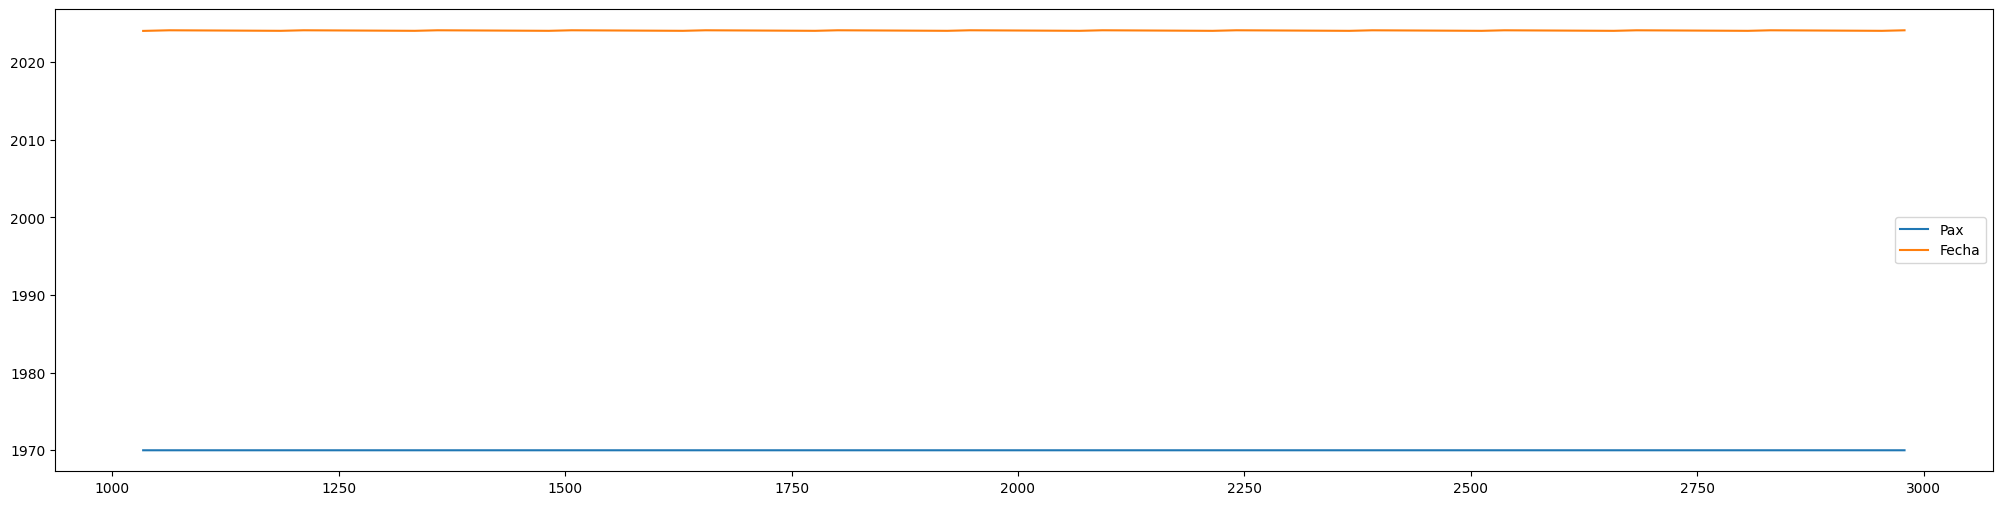

In [8]:
df1.iloc[:,4:6].plot(figsize=(25,6))

<Axes: >

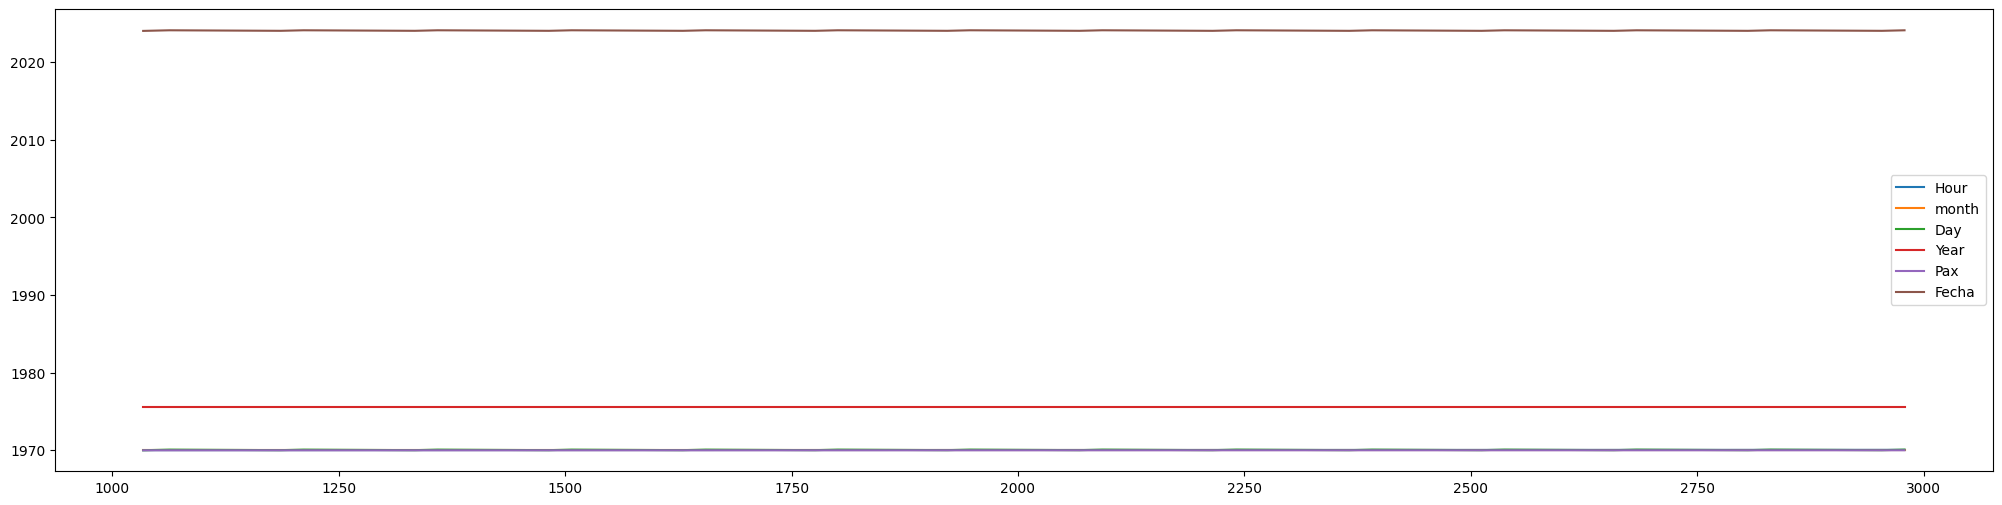

In [7]:
df1.plot(figsize=(25,6))

In [10]:
df[df["Pax"]==6]

,Hour,month,Day,Year,Pax,Date
1441,9,11,24,2023,6,2023-11-24 09:00:00
1609,10,12,15,2023,6,2023-12-15 10:00:00
1755,11,12,15,2023,6,2023-12-15 11:00:00
1838,12,4,17,2024,6,2024-04-17 12:00:00
1873,12,11,16,2023,6,2023-11-16 12:00:00


In [11]:
df[df["Pax"]==5]

,Hour,month,Day,Year,Pax,Date
1459,9,12,13,2023,5,2023-12-13 09:00:00
1488,10,1,12,2024,5,2024-01-12 10:00:00
1513,10,2,7,2024,5,2024-02-07 10:00:00
1581,10,11,16,2023,5,2023-11-16 10:00:00
1655,11,1,31,2024,5,2024-01-31 11:00:00
1661,11,2,7,2024,5,2024-02-07 11:00:00
1881,12,11,24,2023,5,2023-11-24 12:00:00
1924,13,1,8,2024,5,2024-01-08 13:00:00
1954,13,2,8,2024,5,2024-02-08 13:00:00
1972,13,4,5,2024,5,2024-04-05 13:00:00


In [12]:
df[df["Pax"]==4]

,Hour,month,Day,Year,Pax,Date
1293,8,11,24,2023,4,2023-11-24 08:00:00
1347,9,1,19,2024,4,2024-01-19 09:00:00
1351,9,1,23,2024,4,2024-01-23 09:00:00
1363,9,2,5,2024,4,2024-02-05 09:00:00
1370,9,2,12,2024,4,2024-02-12 09:00:00
...,...,...,...,...,...,...
2151,14,10,31,2023,4,2023-10-31 14:00:00
2242,15,2,1,2024,4,2024-02-01 15:00:00
2392,16,2,1,2024,4,2024-02-01 16:00:00
2420,16,4,9,2024,4,2024-04-09 16:00:00


In [13]:
df[df["Pax"]==3]

,Hour,month,Day,Year,Pax,Date
1272,8,11,3,2023,3,2023-11-03 08:00:00
1312,8,12,14,2023,3,2023-12-14 08:00:00
1343,9,1,15,2024,3,2024-01-15 09:00:00
1358,9,1,30,2024,3,2024-01-30 09:00:00
1364,9,2,6,2024,3,2024-02-06 09:00:00
...,...,...,...,...,...,...
2596,17,11,2,2023,3,2023-11-02 17:00:00
2601,17,11,7,2023,3,2023-11-07 17:00:00
2669,18,1,16,2024,3,2024-01-16 18:00:00
2670,18,1,17,2024,3,2024-01-17 18:00:00


In [14]:
df[df["Pax"]==2]

,Hour,month,Day,Year,Pax,Date
1192,8,1,12,2024,2,2024-01-12 08:00:00
1210,8,1,30,2024,2,2024-01-30 08:00:00
1233,8,4,2,2024,2,2024-04-02 08:00:00
1243,8,4,12,2024,2,2024-04-12 08:00:00
1283,8,11,14,2023,2,2023-11-14 08:00:00
...,...,...,...,...,...,...
2810,19,1,9,2024,2,2024-01-09 19:00:00
2816,19,1,15,2024,2,2024-01-15 19:00:00
2817,19,1,16,2024,2,2024-01-16 19:00:00
2824,19,1,23,2024,2,2024-01-23 19:00:00


In [15]:
df[df["Pax"]==1]

,Hour,month,Day,Year,Pax,Date
1056,7,1,24,2024,1,2024-01-24 07:00:00
1070,7,2,8,2024,1,2024-02-08 07:00:00
1100,7,4,17,2024,1,2024-04-17 07:00:00
1127,7,11,6,2023,1,2023-11-06 07:00:00
1176,7,12,26,2023,1,2023-12-26 07:00:00
...,...,...,...,...,...,...
2939,19,12,20,2023,1,2023-12-20 19:00:00
2940,19,12,21,2023,1,2023-12-21 19:00:00
2941,19,12,22,2023,1,2023-12-22 19:00:00
2947,19,12,28,2023,1,2023-12-28 19:00:00


In [16]:
df[df["Pax"]==0]

,Hour,month,Day,Year,Pax,Date
1034,7,1,2,2024,0,2024-01-02 07:00:00
1035,7,1,3,2024,0,2024-01-03 07:00:00
1036,7,1,4,2024,0,2024-01-04 07:00:00
1037,7,1,5,2024,0,2024-01-05 07:00:00
1038,7,1,6,2024,0,2024-01-06 07:00:00
...,...,...,...,...,...,...
3093,20,12,26,2023,0,2023-12-26 20:00:00
3094,20,12,27,2023,0,2023-12-27 20:00:00
3095,20,12,28,2023,0,2023-12-28 20:00:00
3096,20,12,29,2023,0,2023-12-29 20:00:00


In [5]:
dff = df.iloc[:,4:6]
dff

,Pax,Date
1034,0,2024-01-02 07:00:00
1035,0,2024-01-03 07:00:00
1036,0,2024-01-04 07:00:00
1037,0,2024-01-05 07:00:00
1038,0,2024-01-06 07:00:00
...,...,...
3093,0,2023-12-26 20:00:00
3094,0,2023-12-27 20:00:00
3095,0,2023-12-28 20:00:00
3096,0,2023-12-29 20:00:00


In [18]:
# """ gráfico mostrando nº personas (multiplicado por 10 para mejor visualización) por cada dia de la semana (en horas)"""
# dff.groupby("Date")[["Pax"]].max().plot(figsize=(25,6))
# dff

In [6]:
X = dff["Pax"].values
train = X[:1800]
test = X[1800:]
""" no tenemos estacionalidad"""
adfuller(dff["Pax"])

(-4.016592939772181,
 0.0013260750476490433,
 26,
 2037,
 {'1%': -3.433564315018763,
  '5%': -2.862959925476948,
  '10%': -2.5675259052472796},
 5789.466380856222)

In [7]:
len(train)

1800

In [8]:
print(train)

[0 0 0 ... 1 1 1]


In [9]:
len(test)

264

In [23]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=10,
                            max_p=10,
                            max_q=6,
                            stationary=False,
                            trace=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5517.986, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6387.540, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6192.317, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5597.267, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6385.540, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5494.345, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6043.326, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5485.747, Time=1.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5934.728, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5482.880, Time=0.87 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5881.256, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5490.804, Time=0.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5487.986, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5488.913, Time=1.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept

In [35]:
df[["Hour","Day"]]

,Hour,Day
1034,7,2
1035,7,3
1036,7,4
1037,7,5
1038,7,6
...,...,...
3093,20,26
3094,20,27
3095,20,28
3096,20,29


In [36]:
stepwise_model = ARIMA(order=(10,1,4))
stepwise_model.fit(train, exogenous = df[["Hour","Day"]].values.reshape(-1,1))
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1800
Model:              SARIMAX(10, 1, 4)   Log Likelihood               -2657.631
Date:                Sat, 25 May 2024   AIC                           5347.261
Time:                        10:02:16   BIC                           5435.181
Sample:                             0   HQIC                          5379.717
                               - 1800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.002      0.499      0.618      -0.003       0.005
ar.L1         -0.9552      1.089     -0.877      0.380      -3.089       1.179
ar.L2         -0.7033      0.612     -1.148      0.2

In [11]:
stepwise_model = auto_arima(train,
                   exogenous = df[["Hour","Day"]].values.reshape(-1,1),
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5517.986, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6387.540, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6192.317, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5597.267, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6385.540, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5494.345, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6043.326, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5485.747, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5934.728, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5482.880, Time=0.86 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5881.256, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5490.804, Time=0.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5487.986, Time=0.82 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5488.913, Time=1.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept

In [58]:
# model = auto_arima(train,
#                    start_p = 2,
#                    start_q = 2,
#                    start_d = 2,
#                    max_p = 10,
#                    max_q = 10,
#                    max_d = 6,
#                    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5484.225, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6387.540, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6192.317, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5597.267, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6385.540, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5505.504, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5494.345, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5488.913, Time=1.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5486.719, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5517.986, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5504.696, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5485.747, Time=1.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5502.635, Time=1.46 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5482.792, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [12]:
stepwise_model = ARIMA(order=(5,1,5))
stepwise_model.fit(train)
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1800
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2640.808
Date:                Sat, 25 May 2024   AIC                           5305.617
Time:                        19:30:02   BIC                           5371.556
Sample:                             0   HQIC                          5329.958
                               - 1800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.758      0.448      -0.001       0.002
ar.L1          0.6640      0.063     10.577      0.000       0.541       0.787
ar.L2         -1.2322      0.042    -29.057      0.0

mean_squared_error: 0.5211232061733532
r2_error: -2.2347882951066986


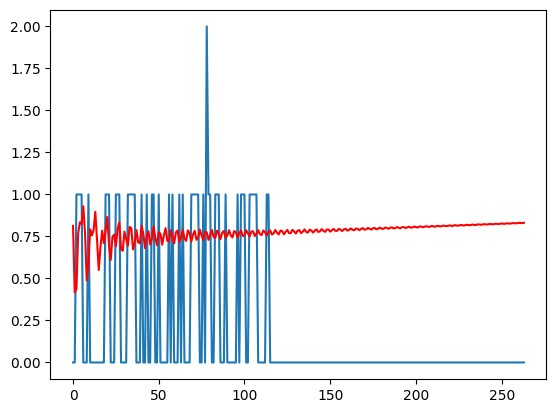

In [41]:
stepwise_model = ARIMA(order=(5,1,5))
stepwise_model.fit(train, exogenous = df[["Hour","Day"]].values.reshape(-1,1))
predictions =stepwise_model.predict(264 , exogenous = df[["Hour","Day"]].values.reshape(-1,1))
print("mean_squared_error:", mean_squared_error(test, predictions))
print("r2_error:", r2_score(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

In [37]:
stepwise_model

ARIMA(order=(10, 1, 4))

In [60]:
# model

ARIMA(order=(10, 1, 4))

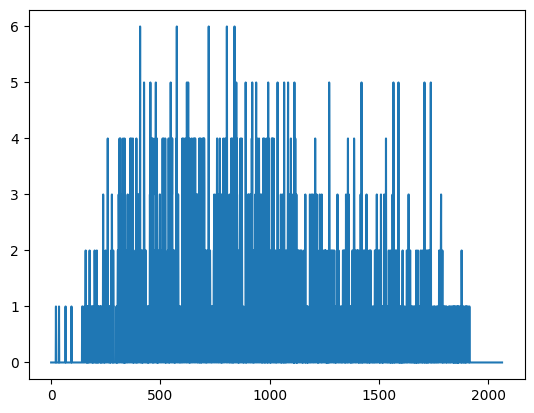

In [61]:
plt.plot(train.tolist() + test.tolist())


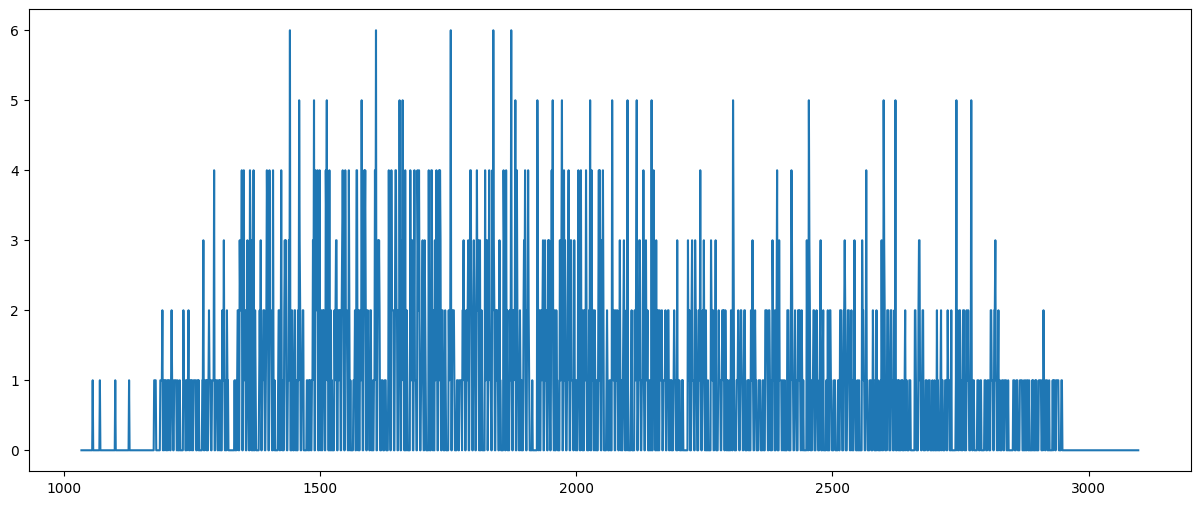

In [62]:
dff['Pax'].plot(figsize=(15,6));

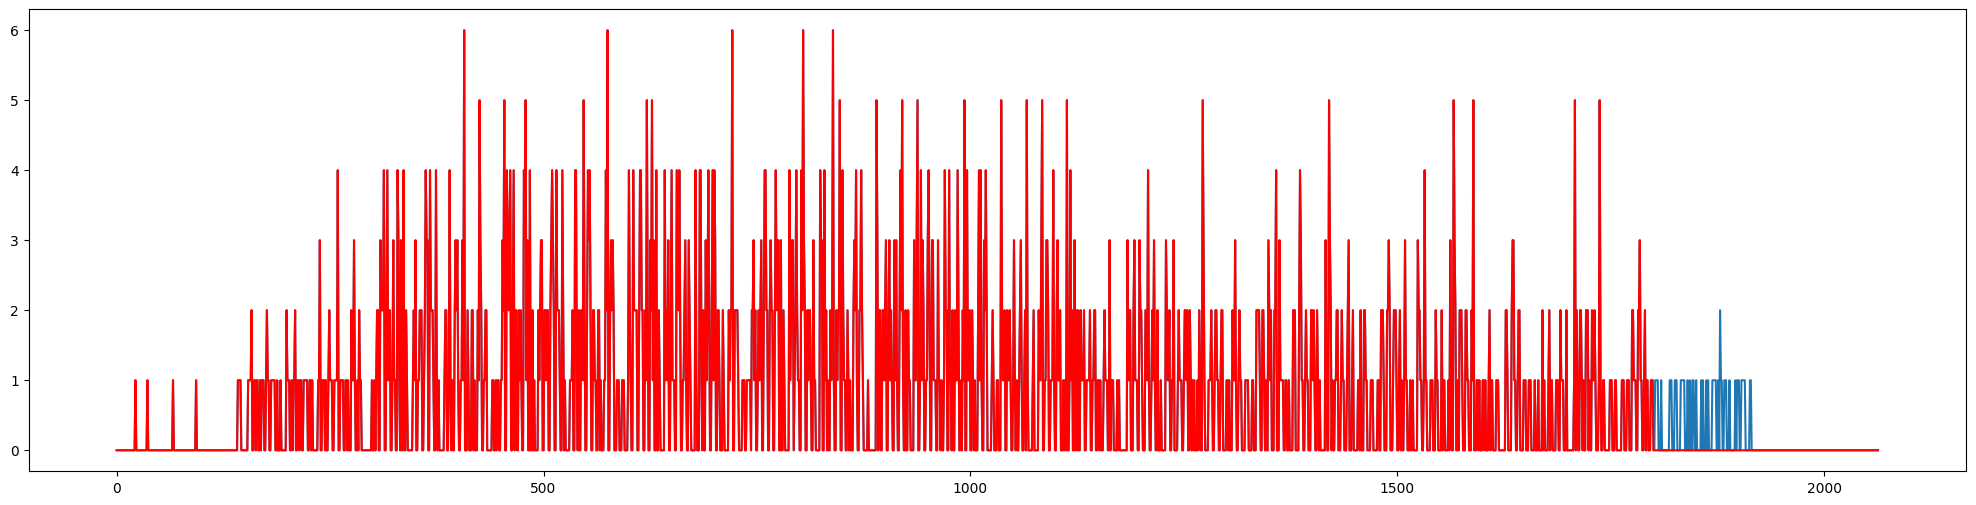

In [27]:
plt.figure(figsize=(25,6))
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist() + stepwise_model.predict(264).astype(int).tolist(),color='red');

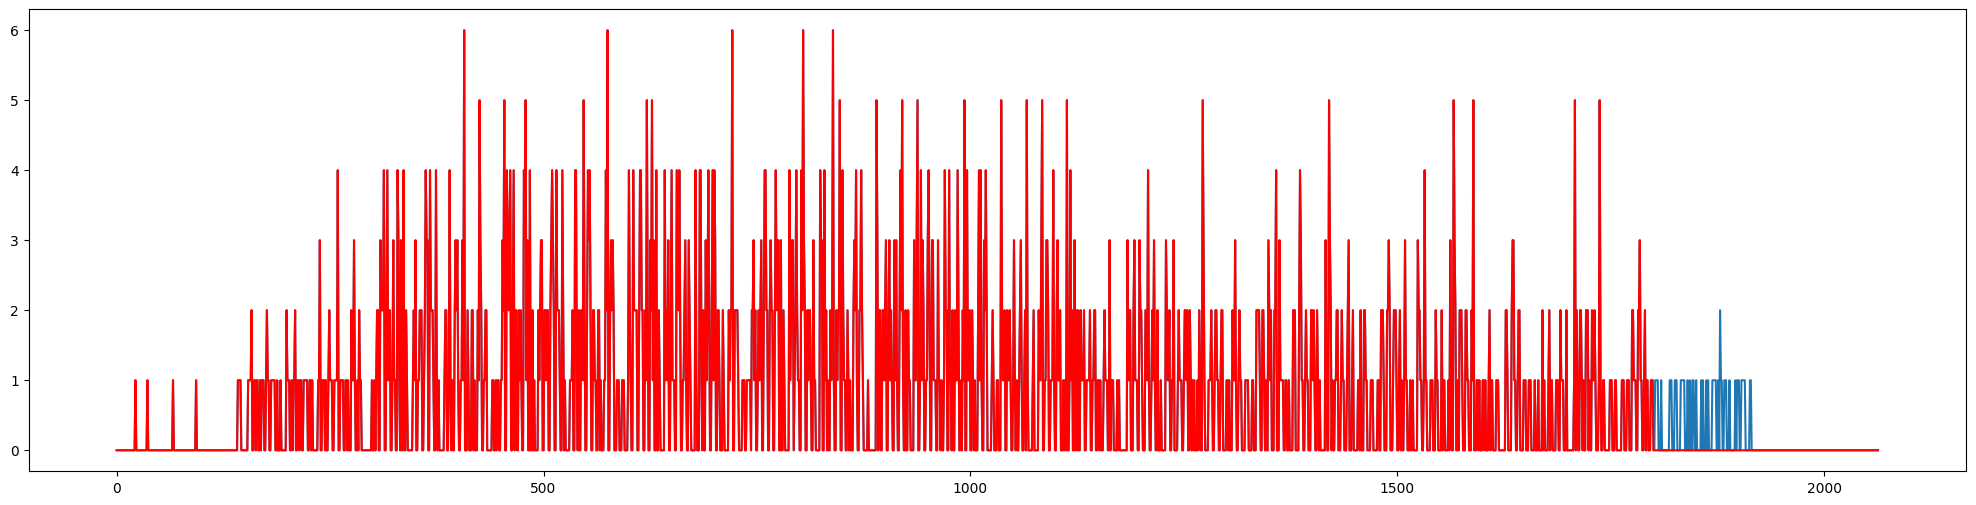

In [65]:
plt.figure(figsize=(25,6))
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist() + model.predict(264).astype(int).tolist(),color='red');

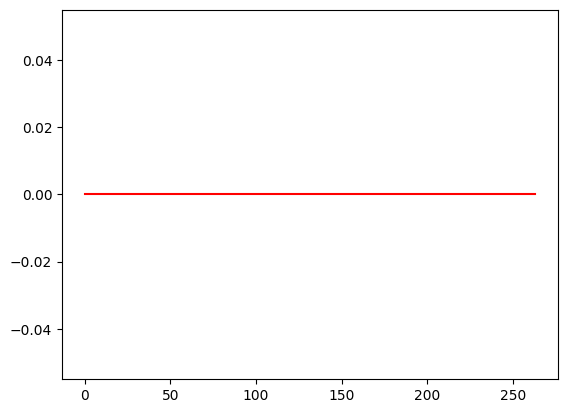

In [66]:
plt.plot( model.predict(264).astype(int).tolist(),color='red');

In [67]:
model.predict(10)

array([0.95191127, 0.51766642, 0.29493591, 0.67412522, 0.81296237,
       0.82847111, 0.8614248 , 0.77116941, 0.63121305, 0.59728076])

In [69]:
predictions = model.predict(264)
print("R2_score:", r2_score(test, predictions))
print("MSE:", np.sqrt(mean_squared_error(test, predictions)))

R2_score: -2.273012562156209
MSE: 0.7261412545468646
